In [1]:
!pip install -U sympy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 26.2 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.11.1
    Uninstalling sympy-1.11.1:
      Successfully uninstalled sympy-1.11.1


In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
t=sp.symbols("t", real=True, positive=True)
x1,x2=sp.symbols("x1,x2",real=True)
s=sp.symbols("s")


In [63]:
f= 2 + x1 - x2
g= -2 + 3*x1 - x2
p = sp.Matrix([f,g])

In [64]:
jac=p.jacobian([x1,x2])
jac

Matrix([
[1, -1],
[3, -1]])

In [65]:
NC1=sp.solve(f,x2)[0]
NC1

x1 + 2

In [66]:
NC2=sp.solve(g,x2)[0]
NC2

3*x1 - 2

In [67]:
A=jac
P,D = A.diagonalize()
P,D

(Matrix([
 [1/3 - sqrt(2)*I/3, 1/3 + sqrt(2)*I/3],
 [                1,                 1]]),
 Matrix([
 [-sqrt(2)*I,         0],
 [         0, sqrt(2)*I]]))

In [68]:
solns = sp.solve([f,g],[x1,x2])
solns

{x1: 2, x2: 4}

In [69]:
SMA=sp.diag(s,s)-A
SMA

Matrix([
[s - 1,     1],
[   -3, s + 1]])

In [72]:
p0 = sp.Matrix([3,3]) # initial conditions
p0

Matrix([
[3],
[3]])

In [73]:
XNH = p.subs({x1:0, x2:0})/s + p0 # const inhomog term + delta for I.C.
XNH

Matrix([
[3 + 2/s],
[3 - 2/s]])

In [74]:
Y = SMA.inv()*(XNH)
Y

Matrix([
[-3*(3 - 2/s)/(3*s**2 + 6) + (3 + 2/s)*(s + 1)/(s**2 + 2)],
[  (3 - 2/s)*(s - 1)/(s**2 + 2) - 3*(3 + 2/s)/(-s**2 - 2)]])

In [75]:
x1_t=sp.inverse_laplace_transform(Y[0],s,t)
x1_t

sqrt(2)*sin(sqrt(2)*t) + cos(sqrt(2)*t) + 2

In [76]:
x2_t =sp.inverse_laplace_transform(Y[1],s,t)
x2_t

2*sqrt(2)*sin(sqrt(2)*t) - cos(sqrt(2)*t) + 4

In [77]:
fn = sp.lambdify((x1,x2),f,'numpy') # get functions to evaluate numerically
gn = sp.lambdify((x1,x2),g,'numpy')
nc1n = sp.lambdify(x1,NC1,'numpy')
nc2n = sp.lambdify(x1,NC2,'numpy')
x1tn = sp.lambdify(t,x1_t,'numpy')
x2tn = sp.lambdify(t,x2_t,'numpy')


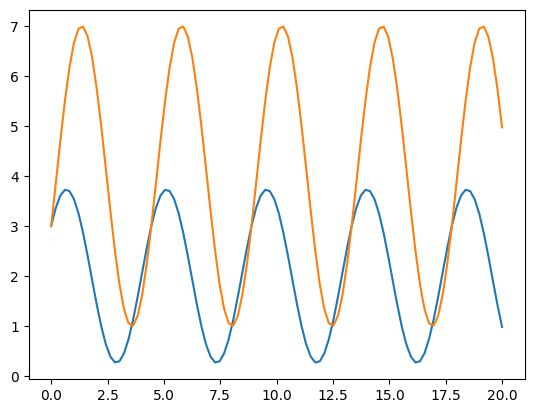

In [78]:
tn = np.linspace(0,20,100)
x1v = x1tn(tn)
x2v = x2tn(tn)
plt.plot(tn,x1v)
plt.plot(tn,x2v)


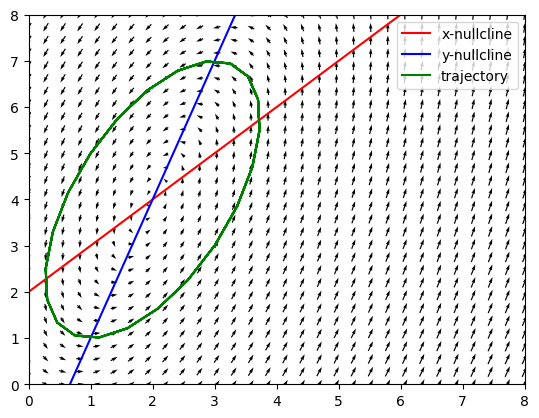

In [80]:
#
# Note this is not showing slopes over time, but directions in the c-f plane
#

xymin=0
xymax=8

xdomain = np.linspace(xymin,xymax,30) # x, need to keep the aspect ratio=1
ydomain = np.linspace(xymin,xymax,30) # y
plt.figure()
plt.xlim([xymin,xymax])
plt.ylim([xymin,xymax])

xm,ym = np.meshgrid(xdomain, ydomain) # xmesh and ymash

sm = np.array([xm,ym]) # smesh as welll

def f_int(s):
  x1 = s[0]
  x2 = s[1]
  return fn(x1,x2),gn(x1,x2)

u,v = f_int(sm)
uvmag = np.sqrt(u**2+v**2) # magnitude of u,v field for scaling
uvmag = np.where(uvmag<1e-10,1,uvmag) # just avoid dividing by zero

plt.quiver(xm,ym,u/(uvmag**0.8),v/(uvmag**.8),pivot='mid')
plt.plot(xdomain,nc1n(xdomain),'r-',label="x-nullcline")
plt.plot(xdomain,nc2n(xdomain),'b-',label="y-nullcline")
plt.plot(x1v,x2v,'g-',label='trajectory')
plt.legend()
